# Model Selection

## Task A

In this notebook, we will assume a pre processed dataset, which was developed in a previous notebook. <br>
We'll evaluate a couple of classifiers performance, when tasked with predicting *gender* and *smiling state* of an image.
We'll then perform an evaluation of pre-processing methods on the datasets.

### Import Modules
These are home made modules to import, split and pre-process the dataset

In [13]:
# To modularise the program, we need to add the current directory to sys path
import os
import sys

# Navigate to where our modules are stored
os.chdir('/Users/gardar/Documents/UCL/ELEC0134 MLS-I Applied Machine Learning Systems/Assignments/Final/code')

# Now we can import our own modules into our script.
import import_data as ds
import split_dataset as sd 
import pre_processing as prp

### Load Data

The data are stored in a local directory, we call a function to properly import them

Importing image data...
Image data is stored in numpy array 'X' of size: (5000, 218, 178, 3)
Importing labels...
Label data is stored in Pandas DataFrame 'y' with dimensions: (5000, 4)
Displaying random images and corresponding labels from set...


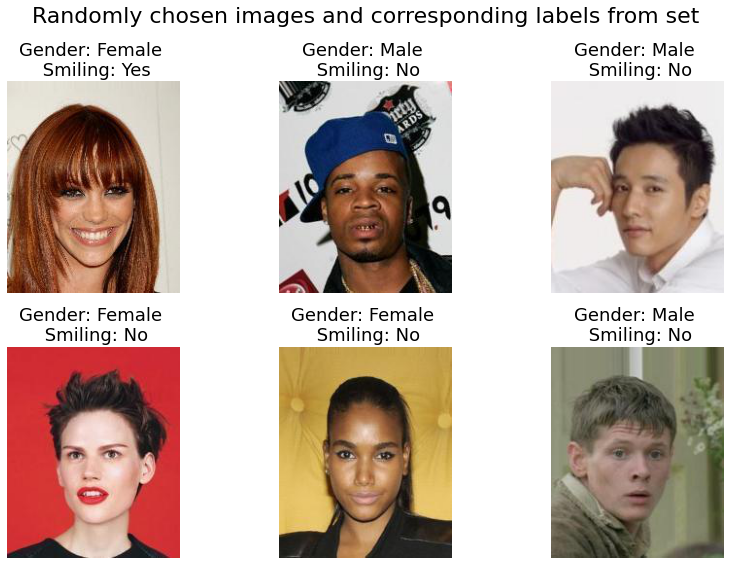

In [14]:
"""
L O A D   D A T A 
"""
# Define a path to the data - REMEMBER TO RESET THIS BEFORE TURNING IN
img_path = "/Users/gardar/Documents/UCL/ELEC0134 MLS-I Applied Machine Learning Systems/Assignments/dataset_AMLS_20-21/celeba/img/"
label_path = "/Users/gardar/Documents/UCL/ELEC0134 MLS-I Applied Machine Learning Systems/Assignments/dataset_AMLS_20-21/celeba/"

# Load image and label data with the novel 'import_data' module
X , y , random_img = ds.dataImport(img_path,label_path,surpress=False,return_img_indices=True)

### Split Data
We'll then split the data into training-, validation- and test folds.

Plotting the dataset split...


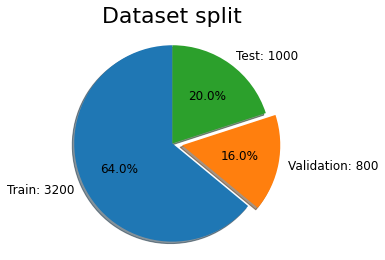

In [15]:
"""
S P L I T   D A T A
"""
    
# Split dataset into train-, validation- and test folds
Xtrain,Xval,Xtest,ytrain,yval,ytest = sd.split_dataset(X,y,test_size=0.2,val_size=0.2,surpress=False)

### Pre-Process Data
Prior to training our classifiers on the data, we perform pre-processing.
This involves some image processing, in the form of merging the RGB channels to a single Grayscale plane, centering the image data on the mean, and then performing principal component analysis with Singular Value Decomposition.

Encoding RGB channels to Rec. 601 grayscale...
Centering images...
Displaying the average face from the data...


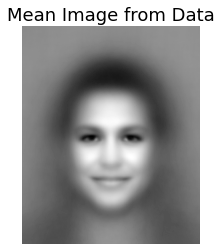

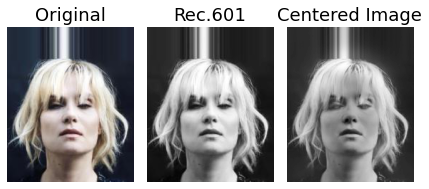

Encoding RGB channels to Rec. 601 grayscale...
Centering images...
Encoding RGB channels to Rec. 601 grayscale...
Centering images...
Performing PCA with Singular Value Decomposition...
Displaying scree plot...


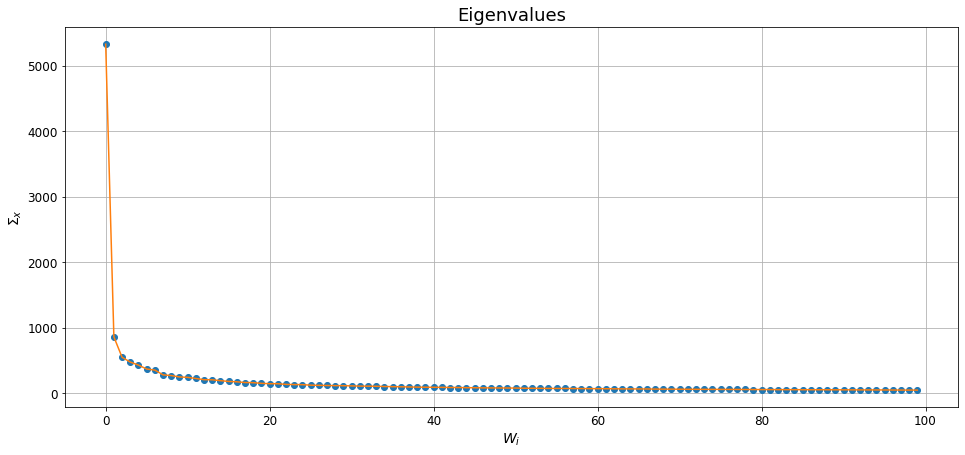

In [16]:
"""
P R E - P R O C E S S   D A T A 
"""
# Center images on mean
Xtrain,XtrainMean = prp.imgProcessing(Xtrain,surpress=False,mean=None)
Xval,XtrainMean = prp.imgProcessing(Xval,surpress=True,mean=XtrainMean) ## <------ FIX ME, BÆTA VIÐ OPTIONAL ARGUEMENT, REIKNAR FRÁ SUPPLIED MEAN ANNARS REIKNAR HANN MEAN
Xtest,XtrainMean = prp.imgProcessing(Xtest,surpress=True,mean=XtrainMean)

# Perform PCA on test data to obtain eigenvalues and vectors
Sigma,WT = prp.PCA_w_SVD(Xtrain,surpress=False)

### Eigenfaces
The "essentially extracted" training data is now in the form of eigenvectors, which are indicative of the sample's deviation from the mean.

Displaying 10 first eigenfaces...


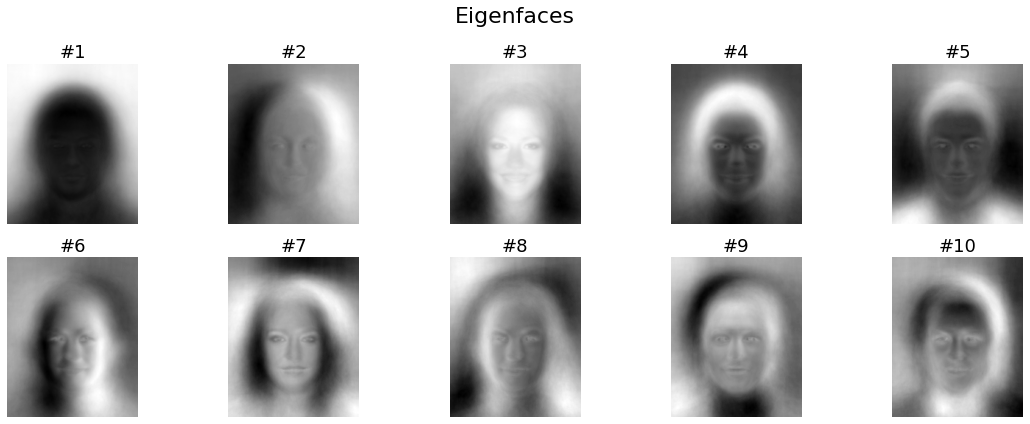

In [17]:
"""
V I S U A L I S E   E I G E N F A C E S 
"""
# Let's check what these spooky eigenfaces look like
prp.showEigenfaces(WT,X)

### Fit Validation and Test 

We now transform our training, validation and testing data so that it fits the base established by the Principal Component Analysis:

In [18]:
"""
F I T   V A L I D A T I O N   A N D   T E S T   T O   P C A 
"""

# Number of components to keep
n_components = 150

Xtrain = prp.fitPCA(WT,Xtrain,n_components=n_components)
Xval = prp.fitPCA(WT,Xval,n_components=n_components)
Xtest = prp.fitPCA(WT,Xtest,n_components=n_components)

Fitting to PCA base
Fitting to PCA base
Fitting to PCA base


And verify that the shape is as should be:

In [19]:
Xtrain.shape

(3200, 150)

### Prepare Labels

In [20]:
# The labels are -1 = Female, 1 = Male
# Here, I'm transferring them to the space I € [0...1]
ytrain_A1 = ytrain['gender'].values[:]
ytrain_A1[ytrain_A1<0] = 0
yval_A1 = yval['gender'].values[:]
yval_A1[yval_A1<0] = 0
ytest_A1 = ytest['gender'].values[:]
ytest_A1[ytest_A1<0]=0

# The labels are -1 = Female, 1 = Male
# Here, I'm transferring them to the space I € [0...1]
ytrain_A2 = ytrain['smiling'].values[:]
ytrain_A2[ytrain_A2<0] = 0
yval_A2 = yval['smiling'].values[:]
yval_A2[yval_A2<0] = 0
ytest_A2 = ytest['smiling'].values[:]
ytest_A2[ytest_A2<0]=0

# Task A with Logistic Regression

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np

# Normalise the data to the interval R € [0...1]
scaler = MinMaxScaler() # This estimator scales and translates each feature individually such that it is in the given range on the training set, default between(0,1)
XtrainScl = scaler.fit_transform(Xtrain)
XvalScl = scaler.fit_transform(Xval)
XtestScl = scaler.transform(Xtest)

In [22]:
# sklearn functions implementation
def logRegrPredict(Xtrain,ytrain,Xtest ):
    # Build Logistic Regression Model
    logreg = LogisticRegression(solver='lbfgs') # lbfgs solver used for small datasets, 
    # Train the model using the training sets
    logreg.fit(Xtrain, ytrain)
    ypred= logreg.predict(Xtest)
    #print('Accuracy on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
    return ypred

In [23]:
ypred_A1 = logRegrPredict(XtrainScl, ytrain_A1, XtestScl)

In [25]:
print('Accuracy on test set: '+str(accuracy_score(ytest_A1,ypred_A1)))
print(classification_report(ytest_A1,ypred_A1))#text report showing the main classification metrics

Accuracy on test set: 0.772
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       483
           1       0.96      0.58      0.72       517

    accuracy                           0.77      1000
   macro avg       0.82      0.78      0.77      1000
weighted avg       0.83      0.77      0.76      1000



In [26]:
ypred_A2 = logRegrPredict(XtrainScl, ytrain_A2, XtestScl)

/opt/anaconda3/envs/MLS-I/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
print('Accuracy on test set: '+str(accuracy_score(ytest_A2,ypred_A2)))
print(classification_report(ytest_A2,ypred_A2))#text report showing the main classification metrics

Accuracy on test set: 0.809
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       488
           1       0.75      0.93      0.83       512

    accuracy                           0.81      1000
   macro avg       0.83      0.81      0.80      1000
weighted avg       0.83      0.81      0.81      1000



# Compare with PCA from Library

I've disabled these cells by changing them to Raw NB Convert format. <br>
The reason being that I did not by a far mile reach similar results using library PCA. <br>
The accuracy on test and validation data was as follows:

**PCA method comparison on data with logistic regression**

|Classification|Procured PCA|scikit-learn PCA|
|:--|--:|--:|
Task A1 - Gender| **~70%**|~50%|
Task A2 - Smile| **~60%**|~50%|

*Note - this accuracy was when principal components were set to 20*<br>
*Increasing principal components for the library classifier did not yield better results*<br>
*It seems more components ~150, for the procured PCA can yield relatively good accuracy, ~85%*

So the pre-processing methods I built seem to yield better results - *at least with simple logistic regression, let's see how well it fares with other classification models*

# Task A with kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

def KNNClassifier(Xtrain, ytrain, Xtest,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Xtrain, ytrain) # Fit KNN model


    ypred = neigh.predict(Xtest)
    return ypred

## A1

In [29]:
k_range = np.arange(1,50+1,1)
accuracy = np.zeros(k_range.shape)

for k in k_range:
    ypred=KNNClassifier(XtrainScl, ytrain_A1, XtestScl,k)
    score=metrics.accuracy_score(ytest_A1,ypred)
    accuracy[k-1] += score

k_accuracy = pd.DataFrame(accuracy,columns=['Accuracy']).set_index(k_range)

KeyboardInterrupt: 

In [ ]:
column = k_accuracy["Accuracy"]
max_index = column.idxmax()
print("Highest accuracy: {:.1f}%\nWith k: {}".format(accuracy[max_index+1]*100,max_index))

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(k_range,accuracy)
plt.plot(max_index,k_accuracy.values[max_index-1],'o',markersize=14)

## A2

In [ ]:
k_range = np.arange(1,50+1,1)
accuracy = np.zeros(k_range.shape)

for k in k_range:
    ypred=KNNClassifier(XtrainScl, ytrain_A2, XtestScl,k)
    score=metrics.accuracy_score(ytest_A2,ypred)
    accuracy[k-1] += score

k_accuracy = pd.DataFrame(accuracy,columns=['Accuracy']).set_index(k_range)

In [ ]:
column = k_accuracy["Accuracy"]
max_index = column.idxmax()
print("Highest accuracy: {:.1F}%\nWith k: {}".format(accuracy[max_index]*100,max_index))

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(k_range,accuracy)
plt.plot(max_index,k_accuracy.values[max_index-1],'o',markersize=14)

# Task A with Decision Tree

In [31]:
feature_names = ['PC #{}'.format(i) for i in range(n_components)]
class_names = ['Female','Male']
def visualise_tree(tree_to_print):
    plt.figure()
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
    tree.plot_tree(tree_to_print,
               feature_names = feature_names,
               class_names = class_names, 
               filled = True,
              rounded=True);
    plt.show()

In [32]:
from sklearn import tree
from sklearn.metrics import accuracy_score

# Importing the Decision tree classifier from the sklearn library.
tree_params={'criterion':'entropy'} 
clf = tree.DecisionTreeClassifier( **tree_params ) # ** to set parameters, pass a dictionary

## A1

In [33]:
#Training the decision tree classifier on training set. 
# Please complete the code below.
clf.fit(XtrainScl,ytrain_A1)

DecisionTreeClassifier(criterion='entropy')

In [34]:
#Predicting labels on the test set.
# Please complete the code below.
ypred =  clf.predict(XtestScl)

#Use accuracy metric from sklearn.metrics library
print('Accuracy Score on train data: ', accuracy_score(y_true=ytrain_A1, y_pred=clf.predict(XtrainScl)))
print('Accuracy Score on test data: ', accuracy_score(y_true=ytest_A1, y_pred=ypred_A1))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.772


In [35]:
#visualise_tree(clf)

In [36]:
tree_params = {'criterion': 'entropy',
               'min_samples_split':50}

clf = tree.DecisionTreeClassifier(**tree_params)
clf.fit(XtrainScl, ytrain_A1)

print('Accuracy Score on train data: ', accuracy_score(y_true=ytrain_A1, y_pred=clf.predict(XtrainScl)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=ytest_A1, y_pred=clf.predict(XtestScl)))

Accuracy Score on train data:  0.8321875
Accuracy Score on the test data:  0.583


<Figure size 432x288 with 0 Axes>

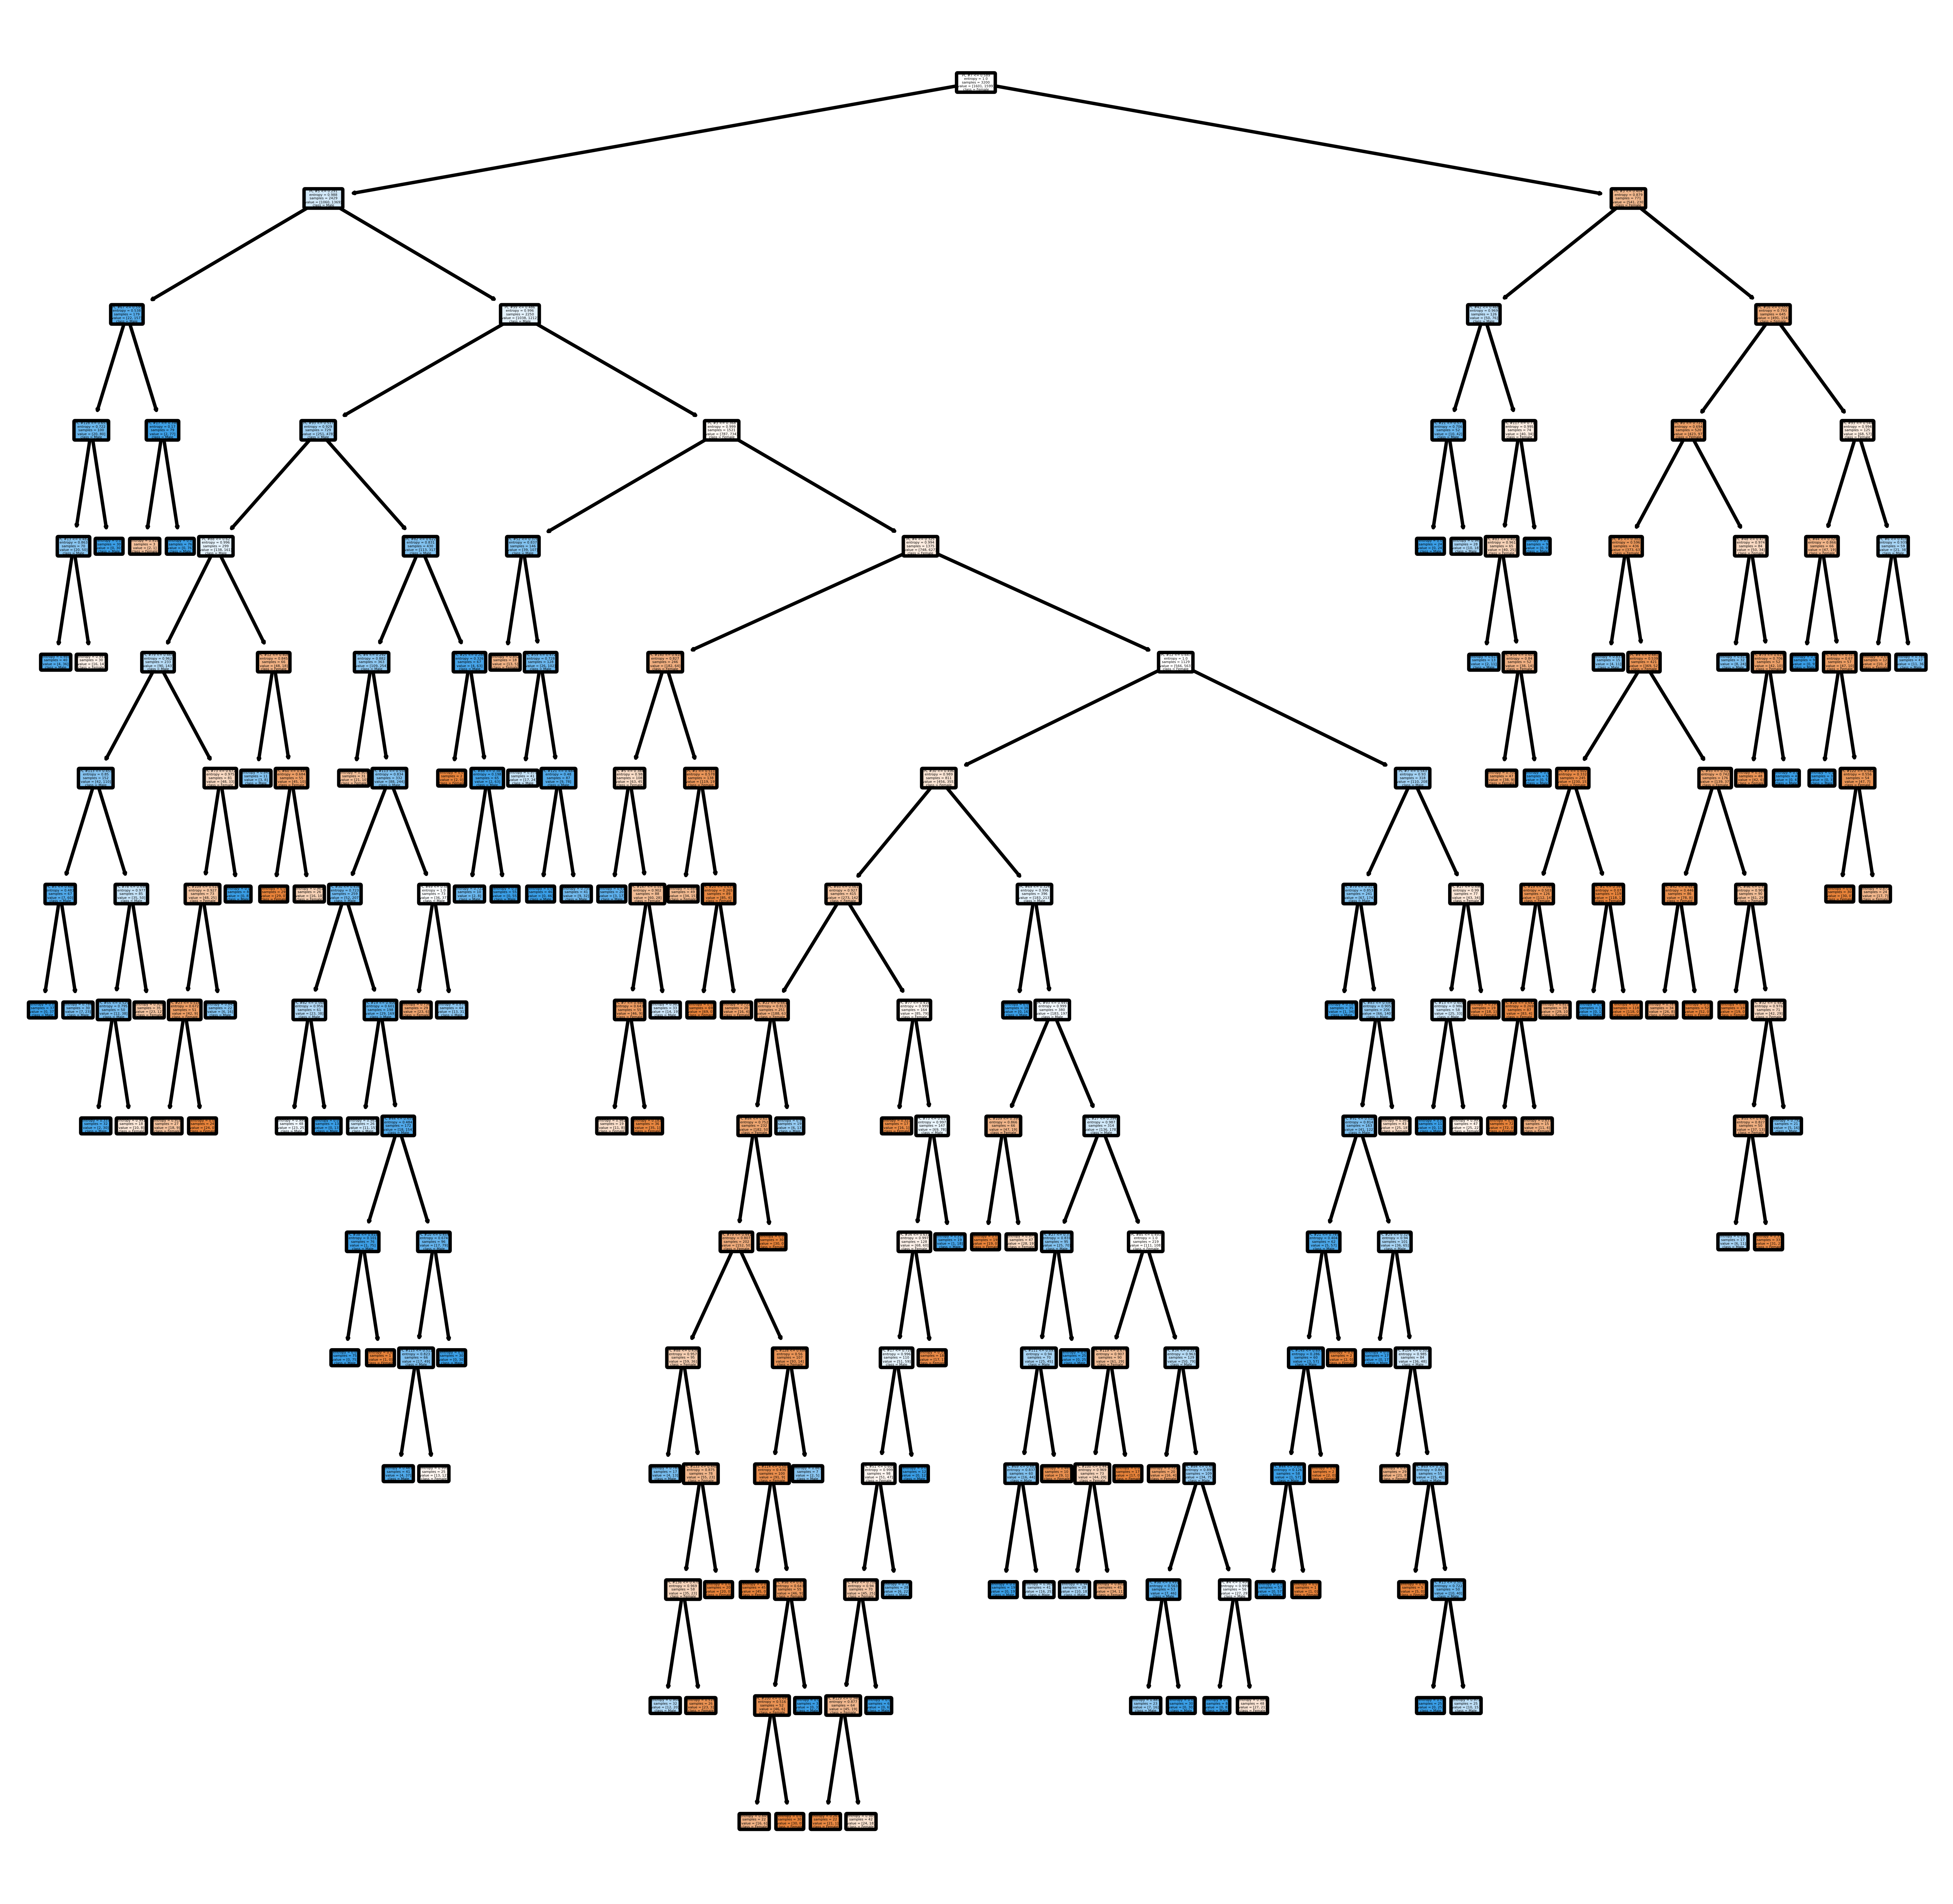

In [37]:
visualise_tree(clf)

## A2

In [38]:
tree_params = {'criterion': 'entropy',
               'min_samples_split':1000}

clf = tree.DecisionTreeClassifier(**tree_params)
clf.fit(XtrainScl, ytrain_A2)

print('Accuracy Score on train data: ', accuracy_score(y_true=ytrain_A2, y_pred=clf.predict(XtrainScl)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=ytest_A2, y_pred=clf.predict(XtestScl)))

Accuracy Score on train data:  0.6315625
Accuracy Score on the test data:  0.612


# Task A with Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
# Complete the code below.
clf.fit(XtrainScl,ytrain_A1)

# prediction on test set
# complete code below.
ypred=clf.predict(XtestScl)

In [40]:
print("Random Forest test Accuracy:", accuracy_score(ytest_A1, ypred_A1))

Random Forest test Accuracy: 0.772


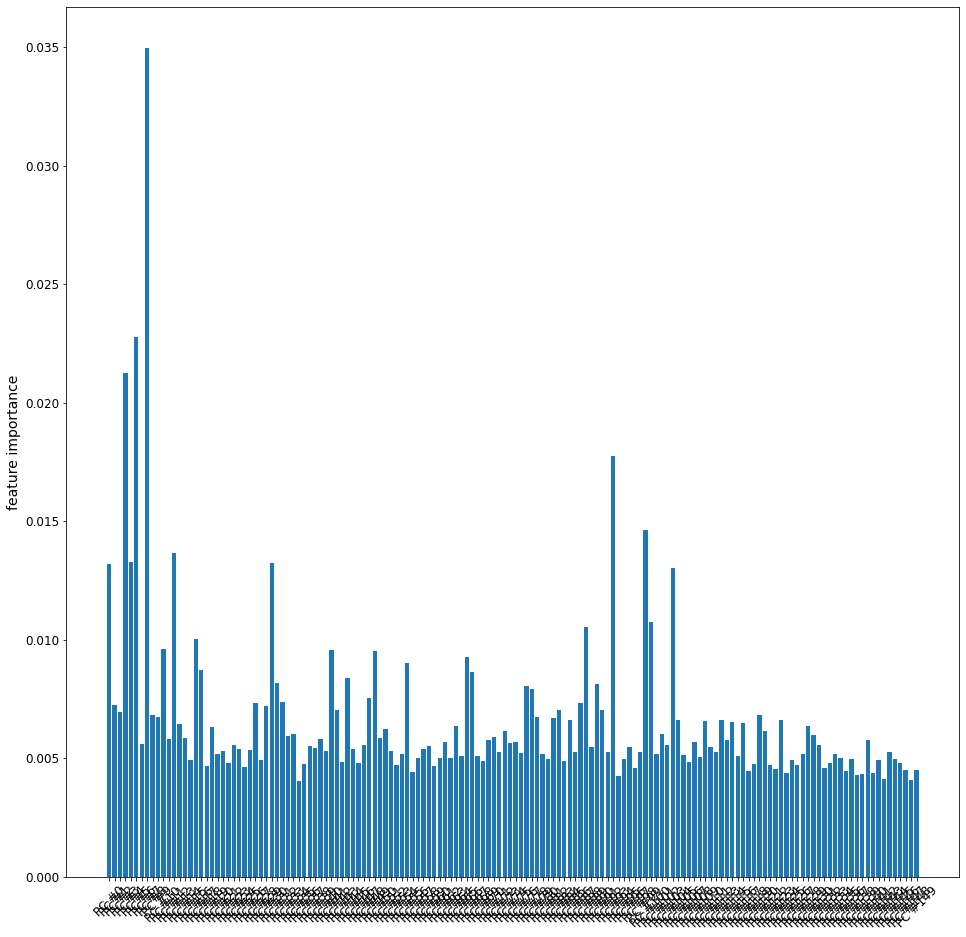

In [41]:
feature_name= feature_names
feature_importance=clf.feature_importances_
plt.figure(figsize=(16,16))
plt.bar(feature_name,feature_importance)
plt.xticks(rotation=45)
plt.ylabel('feature importance')
plt.show()

# Task A with Bagging Classifier

In [33]:
from sklearn.ensemble import BaggingClassifier

def baggingClassifierML(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    bagmodel=BaggingClassifier(n_estimators=k,max_samples=0.5, max_features=4,random_state=1)
    bagmodel.fit(X_train, y_train) # Fit KNN model


    Y_pred = bagmodel.predict(X_test)
    #print (Y_pred)
    return Y_pred

Maximum bagging accuracy achieved: 0.56
With k = 0


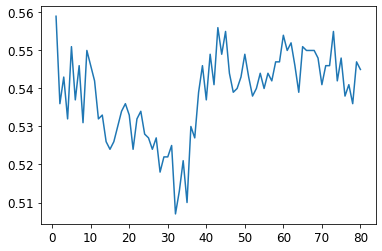

In [34]:
ypred=baggingClassifierML(XtrainScl, ytrain_A1, XtestScl,20)
score=metrics.accuracy_score(ytest_A1,ypred)

k = np.arange(1,80+1,1)
baggingAccuracy = np.zeros(k.shape)

for each in k:
    ypred=baggingClassifierML(XtrainScl, ytrain_A1, XtestScl,each)
    baggingAccuracy[each-1]=metrics.accuracy_score(ytest_A1,ypred)

plt.plot(k,baggingAccuracy)

print('Maximum bagging accuracy achieved: {:.2f}'.format(max(baggingAccuracy)))
print('With k = {}'.format(np.where(baggingAccuracy == max(baggingAccuracy))[0][0]))

# SVM

In [44]:
from sklearn import svm
clf = svm.SVC()
clf.fit(XtrainScl, ytrain_A1)

SVC()

In [133]:
from sklearn import svm
clf = svm.SVC()
clf.fit(Xtrain_Edges, ytrain_A1)

KeyboardInterrupt: 

In [45]:
ypred = clf.predict(XtestScl)

In [46]:
print('Accuracy Score on train data: ', accuracy_score(y_true=ytrain_A1, y_pred=clf.predict(XtrainScl)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=ytest_A1, y_pred=clf.predict(XtestScl)))

Accuracy Score on train data:  0.9678125
Accuracy Score on the test data:  0.836


In [ ]:
ypred = clf.predict(Xtest_Edges)

print('Accuracy Score on train data: ', accuracy_score(y_true=ytrain_A1, y_pred=clf.predict(Xtrain_Edges)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=ytest_A1, y_pred=clf.predict(Xtest_Edges)))

In [47]:
# print prediction results 
print(metrics.classification_report(ytest_A1, ypred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       499
           1       0.87      0.79      0.83       501

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



### SVM Hyper Parameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']
             }  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(XtrainScl, ytrain_A1) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.588, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.566, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.606, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.581, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.595, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.803, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.794, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.833, total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.808, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.855, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.877, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.867, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.873, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.863, total=   0.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.817, total=   1.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.844, total=   1.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.872, total=   0.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.866, total=   0.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.842, total=   1.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.870, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.867, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.873, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.863, total=   1.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.8min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [49]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [50]:
tuned_HP = grid.best_params_

In [51]:
tuned_SVM = svm.SVC(**tuned_HP)

In [52]:
tuned_SVM.fit(XtrainScl, ytrain_A1)

SVC(C=10, gamma=0.1)

In [53]:
ypred = tuned_SVM.predict(XtestScl)

In [54]:
print('Accuracy Score on train data: ', accuracy_score(y_true=ytrain_A1, y_pred=tuned_SVM.predict(XtrainScl)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=ytest_A1, y_pred=tuned_SVM.predict(XtestScl)))

Accuracy Score on train data:  0.9665625
Accuracy Score on the test data:  0.816


In [57]:
# print prediction results 
print(metrics.classification_report(ytest_A1, ypred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       499
           1       0.94      0.68      0.79       501

    accuracy                           0.82      1000
   macro avg       0.84      0.82      0.81      1000
weighted avg       0.84      0.82      0.81      1000



# CNN

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [134]:
batch_size = 128
num_classes = 2
epochs = 50

In [139]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(38804,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [140]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              39736320  
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 514       
Total params: 41,442,562
Trainable params: 41,442,562
Non-trainable params: 0
_________________________________________________________________


In [141]:
# Transform labels for CNN categorical_crossentropy
from keras.utils import to_categorical

ytrain_bin_A1 = to_categorical(ytrain_A1)
yval_bin_A1 = to_categorical(yval_A1)
ytest_bin_A1 = to_categorical(ytest_A1)

In [142]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


history = model.fit(Xtrain_Edges, ytrain_bin_A1,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(Xval_Edges, yval_bin_A1))

Train on 3200 samples, validate on 800 samples
Epoch 1/50
3200/3200 [==============================] - 13s 4ms/step - loss: 8.6019 - accuracy: 0.5044 - val_loss: 0.7053 - val_accuracy: 0.5163
Epoch 2/50
3200/3200 [==============================] - 12s 4ms/step - loss: 0.9000 - accuracy: 0.5291 - val_loss: 0.7274 - val_accuracy: 0.4837
Epoch 3/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.8121 - accuracy: 0.5159 - val_loss: 2.6189 - val_accuracy: 0.4837
Epoch 4/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.8005 - accuracy: 0.5241 - val_loss: 0.9810 - val_accuracy: 0.4837
Epoch 5/50
3200/3200 [==============================] - 13s 4ms/step - loss: 1.1134 - accuracy: 0.5225 - val_loss: 0.7154 - val_accuracy: 0.4837
Epoch 6/50
3200/3200 [==============================] - 12s 4ms/step - loss: 0.7655 - accuracy: 0.5275 - val_loss: 0.6935 - val_accuracy: 0.5013
Epoch 7/50
3200/3200 [==============================] - 12s 4ms/step - loss: 1.2082

In [144]:
ypred = model.predict_classes(Xtest_Edges)

In [145]:
print('Accuracy Score on the test data: ', accuracy_score(y_true=ytest_A1, y_pred=ypred))

Accuracy Score on the test data:  0.496


In [59]:
# Restructure image
Xtrain.shape

(3200, 150)

In [20]:
print("Male/Female ratio in train data: {} / {} %".format(ytrain_A1.sum()/len(ytrain_A1)*100,(100-ytrain_A1.sum()/len(ytrain_A1)*100)))
print("Male/Female ratio in validation data: {} / {} %".format(yval_A1.sum()/len(yval_A1)*100,100-yval_A1.sum()/len(yval_A1)*100))
print("Male/Female ratio in test data: {} / {}%".format(ytest_A1.sum()/len(ytest_A1)*100,100-ytest_A1.sum()/len(ytest_A1)*100))

Male/Female ratio in train data: 50.375 / 49.625 %
Male/Female ratio in validation data: 48.375 / 51.625 %
Male/Female ratio in test data: 50.1 / 49.9%


In [21]:
print("Smiling/Not smiling ratio in train data: {} / {} %".format(ytrain_A2.sum()/len(ytrain_A2)*100,(100-ytrain_A2.sum()/len(ytrain_A2)*100)))
print("Smiling/Not smiling ratio in validation data: {} / {} %".format(yval_A2.sum()/len(yval_A2)*100,100-yval_A2.sum()/len(yval_A2)*100))
print("Smiling/Not smiling ratio in test data: {} / {}%".format(ytest_A2.sum()/len(ytest_A2)*100,100-ytest_A2.sum()/len(ytest_A2)*100))

Smiling/Not smiling ratio in train data: 49.75 / 50.25 %
Smiling/Not smiling ratio in validation data: 49.375 / 50.625 %
Smiling/Not smiling ratio in test data: 51.300000000000004 / 48.699999999999996%
